# Projekt z MI

W tym notebooku przeprowadzona została wstępna analiza otrzymanych danych. Dokonany został podział danych na wejścia i wyjścia oraz została obliczona korelacja pomiędzy poszczególnymi wejściami i wyjściami.

### Zaimportuj potrzebne biblioteki

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("matplotlib version: {}".format(mpl.__version__))
print("seabor version: {}".format(sns.__version__))

pandas version: 1.0.1
numpy version: 1.18.1
matplotlib version: 3.2.0
seabor version: 0.10.0


### Wczytaj dane

In [2]:
df = pd.read_excel("./data/K-1_MI.xlsx", sheet_name="d2")
df["date"] = pd.to_datetime(df["date"])

outputNames = ["O2A", "O2B", "TS1", "TS2", "TS05", "TW02", "TW04"]
outputs = df[outputNames]

inputs = df.drop(outputNames, axis=1)
inputs.head()

,date,FP05,LT1,LT2,LT3,LT4,TMA,TMB,TMC,TMD,...,FW02,TTWS,PTWS,TW01,FW03,TW03,FW04,TTWT,PTWT,PPW
0,2014-07-06 15:30:10,1068.9575,21.4107,11.6199,11.714,18.8643,43.8947,76.1302,75.8843,74.866,...,3.0297,179.844,19.3311,301.2129,9.4894,290.8920,14.2998,177.7786,10.3202,3.5039
1,2014-07-06 15:30:20,1068.9575,21.4107,11.6199,11.714,18.8643,43.8947,76.1302,75.8843,74.866,...,3.0297,179.844,19.3311,301.2129,9.4894,290.8920,14.2998,177.7786,10.3202,3.5039
2,2014-07-06 15:30:30,1068.9575,21.4107,11.6199,11.714,18.8643,43.8947,76.1302,75.8843,74.866,...,3.0297,179.844,19.3147,301.2129,9.4894,292.1826,14.2998,177.7786,10.3202,3.4937
3,2014-07-06 15:30:40,1068.9575,21.4107,11.6199,11.714,18.8643,43.8947,76.1302,75.8843,74.866,...,3.0297,179.844,19.3298,302.4265,9.4894,292.1826,14.2998,177.7786,10.3202,3.4937
4,2014-07-06 15:30:50,1068.9575,21.4107,11.6199,11.714,18.8643,43.8947,76.1302,75.8843,74.866,...,3.1555,179.844,19.3298,302.4265,9.4894,292.1826,14.2998,177.7786,10.3202,3.4937



### Przykładowe wykresy

#### Wykres przepływu wody wtryskowej (strona R) od czasu

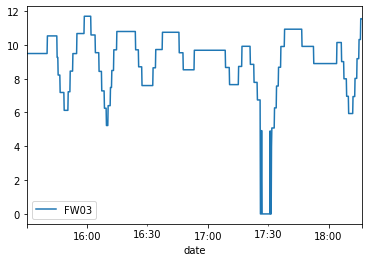

In [3]:
df.plot(x="date", y="FW03")


#### Wykres ciśnienia pary wodnej w walczaku od poziomu wody w walczaku

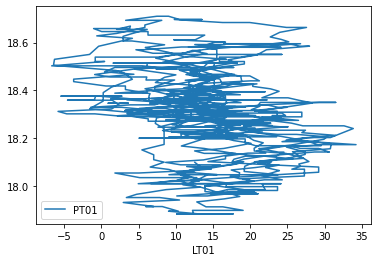

In [4]:
df.plot(x="LT01", y="PT01")

#### Wykres zawartości tlenu w spalinach (strona A) od przepływu powietrza pierwotnego

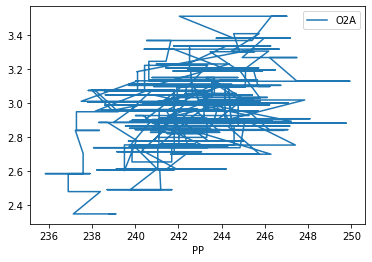

In [5]:
df.plot(x="PP", y="O2A")

### Korelacja zmiennych

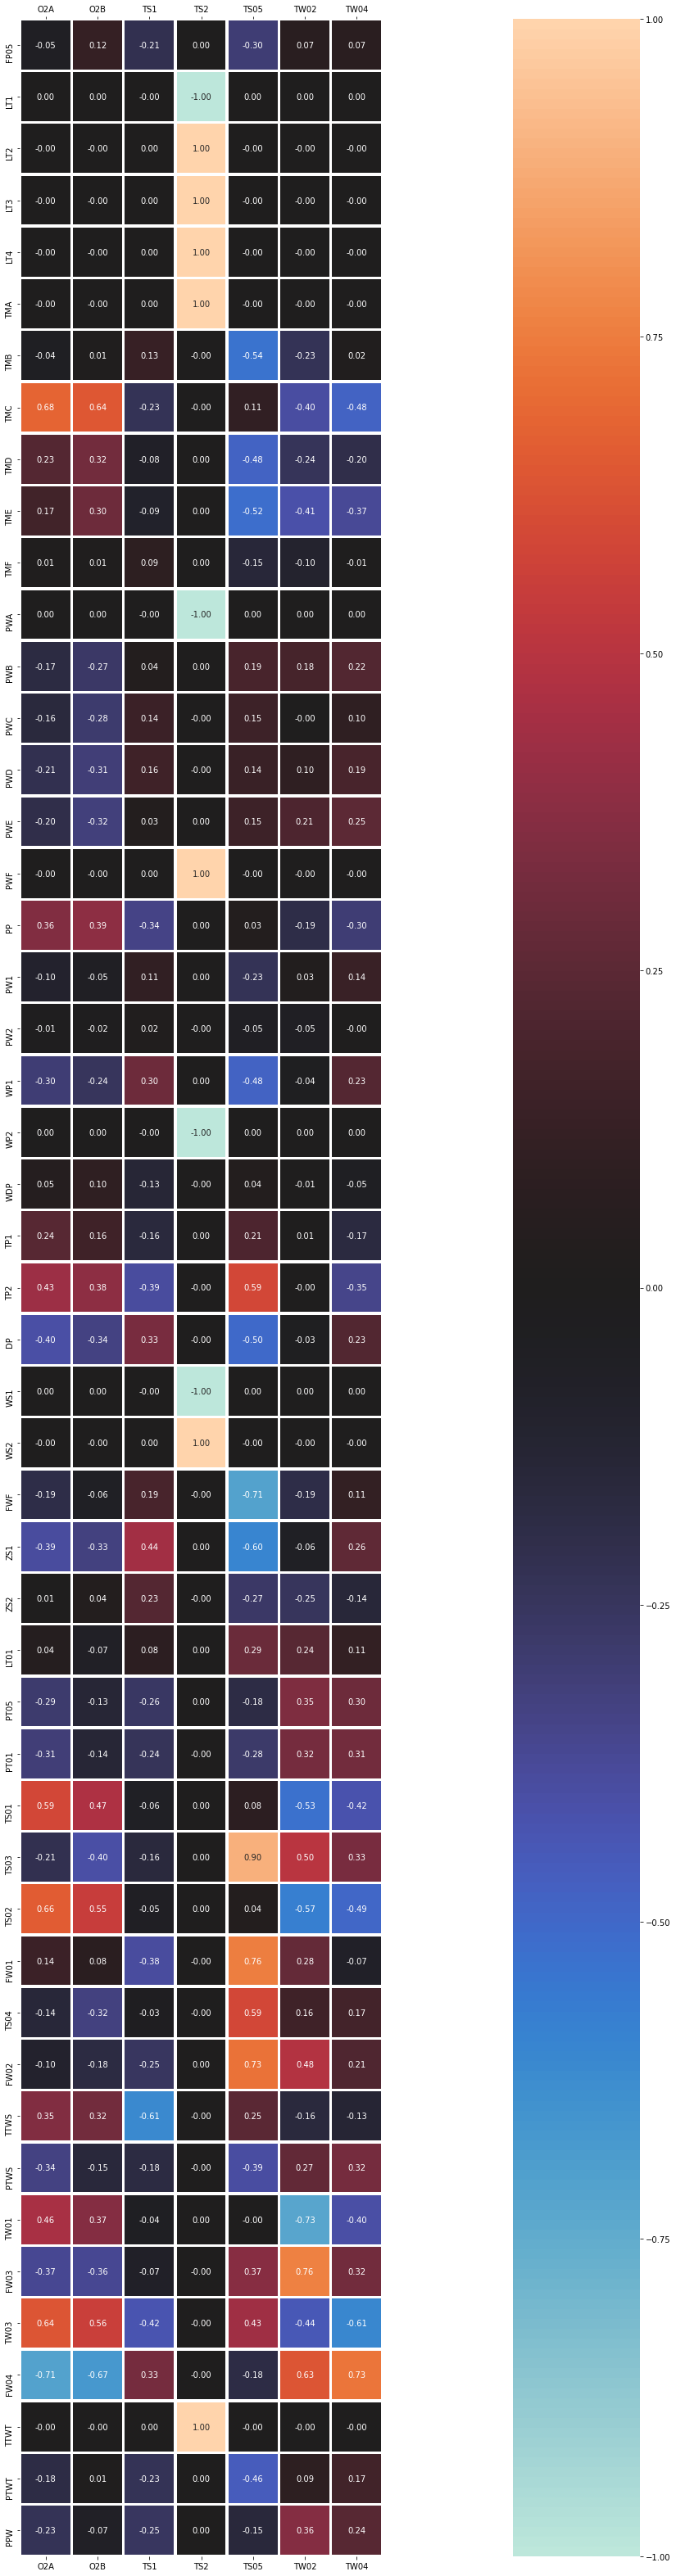

In [36]:
correlations = df.corr()
correlations = correlations[outputNames].drop(outputNames, axis=0)
fig, ax = plt.subplots(figsize=(57,57))
sns.heatmap(correlations, vmax=1.0, vmin=-1.0, center=0, fmt=".2f", square=True, linewidths=2.5, annot=True)
ax.tick_params(top=True, labeltop=True)
plt.show()

In [67]:
MIN_THRESHOLD = 0.5
MAX_THRESHOLD = 1.0

interestingRelations = dict()
for output in outputNames:
    interestingRelations[output] = list()

for row in correlations.iterrows():
    inputName = row[0] 
    dataSeries = row[1]
    for item in dataSeries.iteritems():
        outputName = item[0]
        corr = item[1]
        if(abs(corr) > MIN_THRESHOLD and abs(corr) < MAX_THRESHOLD):
            interestingRelations[outputName].append((inputName, corr))

import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(interestingRelations)

{   'O2A': [   ('TMC', 0.6803580039278425),
               ('TS01', 0.5862420752705183),
               ('TS02', 0.6609385921867631),
               ('TW03', 0.6357279349386824),
               ('FW04', -0.7072455206809626)],
    'O2B': [   ('TMC', 0.6418418691568342),
               ('TS02', 0.5520454270500426),
               ('TW03', 0.5592858213203691),
               ('FW04', -0.667426903308076)],
    'TS05': [   ('TMB', -0.5379080829975528),
                ('TME', -0.5207298724284593),
                ('TP2', 0.587834777996471),
                ('DP', -0.5047007274359181),
                ('FWF', -0.707916962627189),
                ('ZS1', -0.5951426656202009),
                ('TS03', 0.8973115027862273),
                ('FW01', 0.7568882864463206),
                ('TS04', 0.588573723719805),
                ('FW02', 0.725670545004006)],
    'TS1': [('TTWS', -0.6098250259179004)],
    'TS2': [],
    'TW02': [   ('TS01', -0.5308307783952848),
                ('TS03', 0.503349